<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/predicciones_de_ventas_semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import seaborn as sns
drive.mount ("/content/drive")


Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/Data CodingDojo/sales_predictions.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#1. caracteristicas de dataframe principal
Filas 8523 - Columnas 12

In [5]:
df.shape

(8523, 12)

#2. Tipos de dato en cada columna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#3. Duplicados
la funcion .duplicated no arroja resultados.
buscando por columnas como Item_Identifier se pueden identificar algunos duplicados pero se debe al mismo productos en distintas tiendas.

para mayor seguridad, busque tanto identificador de item como identificador de tienda para buscar duplicados. arrojando 0 valores duplicados

In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated(["Item_Identifier","Outlet_Identifier"]).sum()

0

#4. Valores faltantes

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


#5.1 Para la columna Item_Weight, se procedera con el llenado de datos segun la promedio de todos, no es la forma mas precisa pero mientras se busca una definitiva.
la forma definitiva seria llenar el dato con el peso del mismo producto pero ubicado en otras tiendas.


In [12]:
#Ejemplo, el item buscado esta dentro de los valores null pero cuando se busca a nivel general, se puede identificar su peso.
df[df["Item_Identifier"]== "FDP10"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [13]:
peso_promedio = df["Item_Weight"].mean()
peso_promedio

12.857645184135976

In [14]:
#NO ES LA MEJOR FORMA, SE BUSCA SOLUCION DEFINITIVA
df["Item_Weight"].fillna(peso_promedio, inplace=True)

#5.2 Outlet_Size, se llenara dato categorico con la moda.

In [15]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


OUT010 1998 TIER3 GROCERY STORE

OUT017 2017 TIER2 SUPERMARKET TYPE1

OUTO045 2002 TIER 2 SUPERMARKET TYPE1


In [16]:
df["Outlet_Size"] = df["Outlet_Size"].astype(str)

In [17]:
moda_outlet = df["Outlet_Size"].mode()
moda_outlet.values[0]

'Medium'

In [18]:
df["Outlet_Size"].fillna(moda_outlet.values[0], inplace=True)

In [19]:
# Ya no quedan valores nulos
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#7. Categoria incosistente

In [22]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")

# Estadisticas resumidas

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Histograma


### Se busca conocer el promedio de ventas de los items Low Fat en las tiendas "Grocery Store"

In [23]:
#definicion de variables y filtros
low_fat = df["Item_Fat_Content"]=="Low Fat"
grocery_store = df["Outlet_Type"] == "Grocery Store"

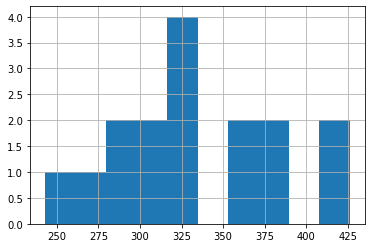

In [24]:
df[grocery_store & low_fat].groupby("Item_Type")["Item_Outlet_Sales"].mean().hist()

# Boxplot

Se busca evaluar los objetos vendidos en tienda tipo "Grocery Store" y el rango de valor de ellos.

esto para identificar posibles outliers o precios fuera de lo comun

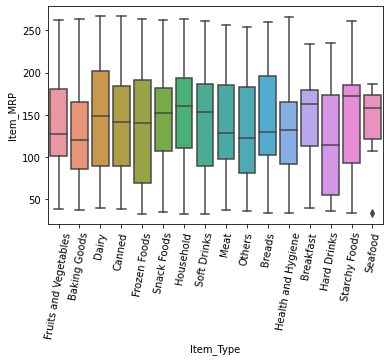

In [25]:
#Filtros para graficar
tienda = df["Outlet_Type"] == "Grocery Store"  # aislamos el tipo de tienda para su analisis

df_tienda = df[tienda] # se asigna filtro a dataframe


grafico = sns.boxplot(x="Item_Type",y="Item_MRP", data=df_tienda)
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=80); #linea de codigo nos ayuda a rotar etiquetas para su mejor comprension. fuente: stackoverflow

In [48]:
#OUTLIER visto en Comida tipo Seafood
df_tienda[(df_tienda["Item_Type"] == "Seafood") & (df_tienda["Item_MRP"] > 50)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1176,FDK45,12.857645,Low Fat,0.059281,Seafood,111.5860,OUT019,1985,Small,Tier 1,Grocery Store,339.5580
1575,FDG33,12.857645,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
1880,FDH21,12.857645,Low Fat,0.054671,Seafood,158.6604,OUT019,1985,Small,Tier 1,Grocery Store,316.9208
2728,FDG33,5.365000,Regular,0.234733,Seafood,173.4764,OUT010,1998,nan,Tier 3,Grocery Store,171.7764
2767,FDJ57,7.420000,Regular,0.036110,Seafood,186.5582,OUT010,1998,nan,Tier 3,Grocery Store,185.7582
4502,FDH21,10.395000,Low Fat,0.052264,Seafood,158.4604,OUT010,1998,nan,Tier 3,Grocery Store,158.4604
6814,FDJ57,12.857645,Regular,0.000000,Seafood,184.3582,OUT019,1985,Small,Tier 1,Grocery Store,185.7582
6903,FDG21,12.857645,Regular,0.256152,Seafood,151.0050,OUT019,1985,Small,Tier 1,Grocery Store,149.8050
7332,FDF33,7.970000,Low Fat,0.036046,Seafood,107.5596,OUT010,1998,nan,Tier 3,Grocery Store,431.4384


Grafico nos permite ver valores minimos y maximos, como tambien la concentracion de precios de productos por categoria.

In [27]:
df_tienda["Item_Outlet_Sales"]

3       732.3800
23      214.3876
28      178.4344
29      125.8362
30      163.7868
          ...   
8473    431.4384
8480    459.4020
8486     45.2744
8490    487.3656
8509    424.7804
Name: Item_Outlet_Sales, Length: 1083, dtype: float64

# Heatmap

Se busca identificar una relacion entre suma vendida y visibilidad de item en las tiendas "Grocery Store".

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


se crea un dataframe a partir de las columnas de interes

In [38]:
df_vision = df[["Item_Visibility","Item_Type","Item_MRP","Item_Weight","Item_Outlet_Sales","Outlet_Type"]]

A continuacion se crea filtro para tienda Grocery Store

In [43]:
filtro_tienda = df_vision["Outlet_Type"] == "Grocery Store"

corr = df_vision[filtro_tienda].corr()

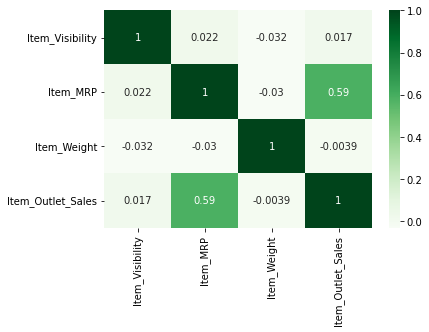

In [44]:
grafico_heatmap =sns.heatmap(corr, cmap="Greens", annot=True)

Se puede apreciar una  correlacion positiva entre los valores

item_visibility y item_outlet_sales, aunque pequena. es donde se pretende mejorar para aumentar las ventas